In [11]:
import cv2
import numpy as np
from scipy.misc import imread
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
import time

%matplotlib inline

In [24]:
def hog_feature_size(image, pixels_per_cell, cells_per_block, orient):
    sy, sx = image.shape[:2]
    cx, cy = pixels_per_cell
    bx, by = cells_per_block

    n_cellsx = int(np.floor(sx // cx))  # number of cells in x
    n_cellsy = int(np.floor(sy // cy))  # number of cells in y
    n_blocksx = (n_cellsx - bx) + 1
    n_blocksy = (n_cellsy - by) + 1
    
    return n_blocksy * n_blocksx * by * bx * orient

def hog_features(img, orient, pix_per_cell, cells_per_block, vis=False):
    if len(img.shape) == 2:
        img = np.expand_dims(img, axis=2)

    features = np.zeros((img.shape[2], hog_feature_size(img, pix_per_cell, cells_per_block, orient)))

    if vis:
        hog_image = np.zeros(img.shape, dtype=np.float32)

    for ch in range(img.shape[2]):
        hog_result = hog(img[:, :, ch], orientations=orient, pixels_per_cell=pix_per_cell,
                         cells_per_block=cells_per_block, transform_sqrt=True,
                         visualise=vis, feature_vector=True)

        if vis:
            features[ch] = hog_result[0]
            hog_image[:, :, ch] = hog_result[1]
        else:
            features[ch] = hog_result

    features = features.ravel()

    if vis:
        return features, hog_image
    else:
        return features

# Sample data

In [25]:
car_64x64 = imread('../test_images/car_64x64.jpg')
car_128x128 = imread('../test_images/car_128x128.jpg')
car_64x128 = imread('../test_images/car_64x128.jpg')

images = [car_64x64, car_128x128, car_64x128]
titles = ['64x64', '128x128', '64x128']

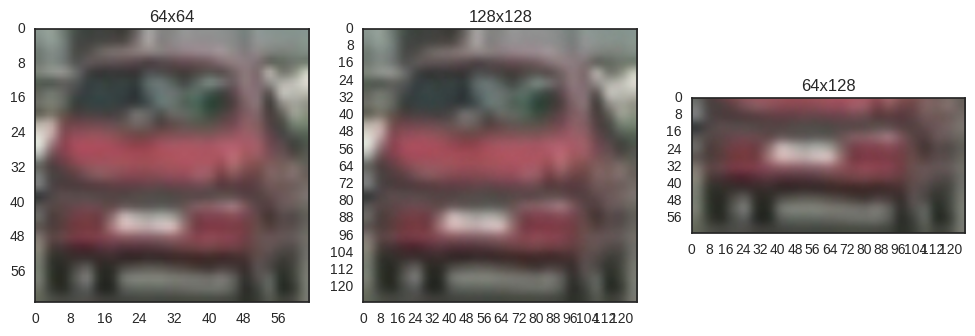

In [26]:
sns.set_style(style='white')
fig, axis = plt.subplots(1, 3, figsize=(12,6))
for i, (img, title) in enumerate(zip(images, titles)):   
    axis[i].imshow(img)
    axis[i].set_title(title)
    axis[i].set_xticks(np.arange(0, img.shape[1]+8, 8))
    axis[i].set_yticks(np.arange(0, img.shape[0]+8, 8))
    axis[i].set_xlim(0, img.shape[1]-1)
    axis[i].set_ylim(img.shape[0]-1, 0)

#plt.xticks(np.arange(0, 72, 8))
plt.show()

# Default HOG implementation

In [27]:
orient = 9
pix_per_cell = (8, 8)
cells_per_block = (2, 2)
img_size = (64, 64)

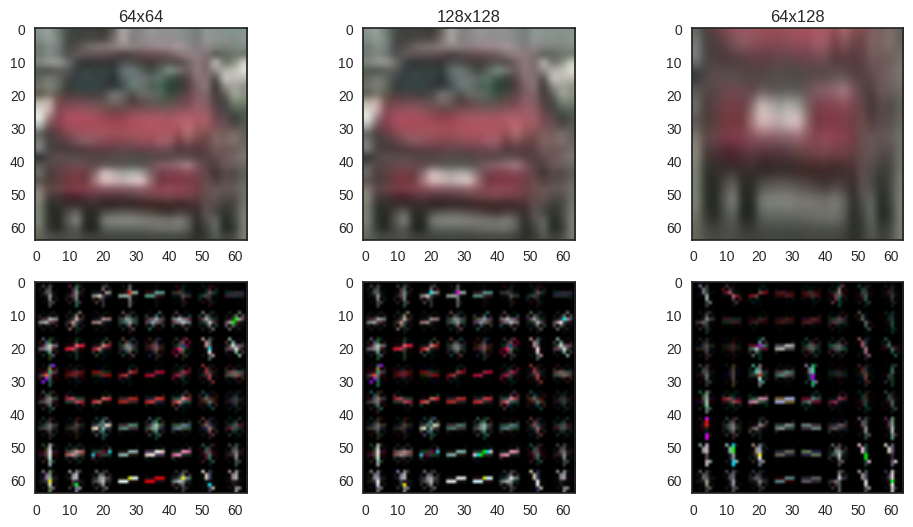

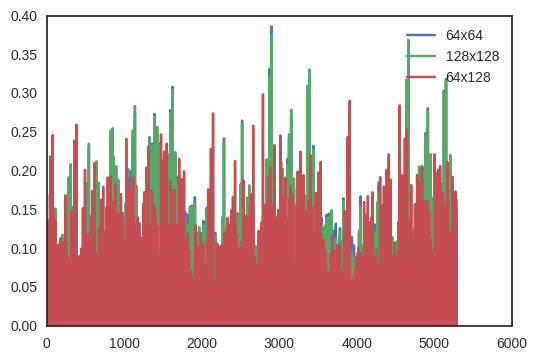

In [28]:
features = []

fig, axis = plt.subplots(2, 3, figsize=(12,6))
for i, (img, title) in enumerate(zip(images, titles)):
    img = cv2.resize(img, img_size)
    axis[0, i].imshow(img)
    axis[0, i].set_title(title)
    
    feature_vec, img_hog = hog_features(img, orient, pix_per_cell, cells_per_block, vis=True)
    features.append(feature_vec)
    axis[1, i].imshow(img_hog)
plt.show()   

hogs = []
for feature_vec, title in zip(features, titles):
    hogs.append(plt.plot(feature_vec, label=title)[0])
    
plt.legend(handles=hogs)
plt.show()

# HOG with fix number of cells

In [29]:
orient = 9
nb_cells = (8, 8)
cells_per_block = (2, 2)

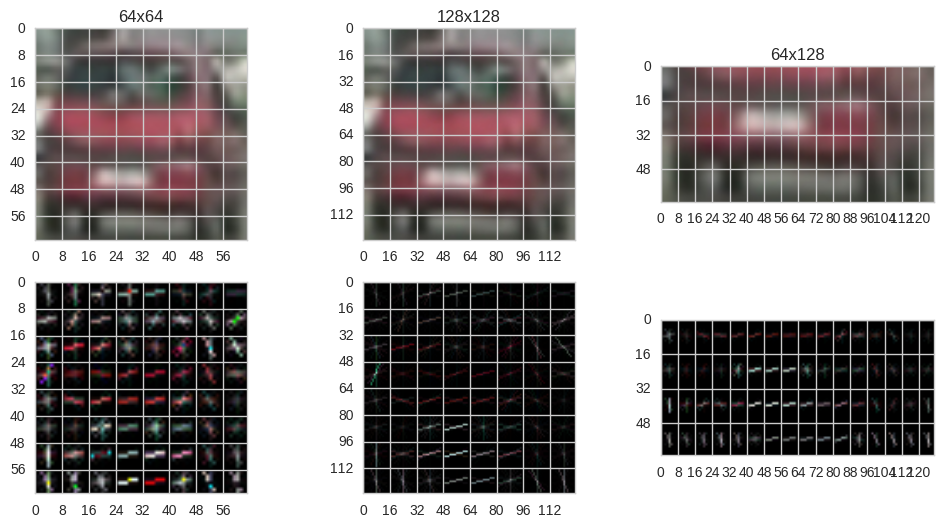

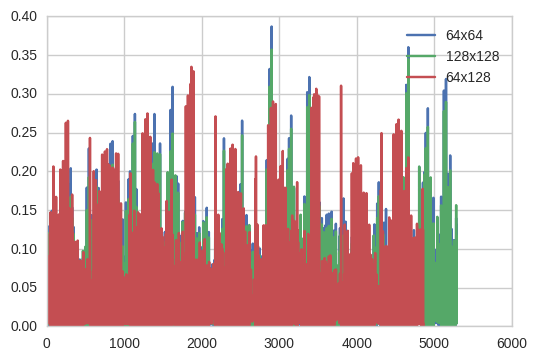

In [30]:
sns.set_style(style='whitegrid')
features = []

fig, axis = plt.subplots(2, 3, figsize=(12,6))
for i, (img, title) in enumerate(zip(images, titles)):
    axis[0, i].imshow(img)
    axis[0, i].set_title(title)

    img_height = img.shape[0]
    img_width = img.shape[1]
    px = int(np.floor(img_width // nb_cells[1]))
    py = int(np.floor(img_height // nb_cells[0]))
    pix_per_cell = (py, px)

    for j in range(2):
        axis[j, i].set_yticks(np.arange(0, img_height+px, px))
        axis[j, i].set_xticks(np.arange(0, img_width+py, py))
        axis[j, i].set_xlim(0, img_width-1)
        axis[j, i].set_ylim(img_height-1, 0)
    

    feature_vec, img_hog = hog_features(img, orient, pix_per_cell, cells_per_block, vis=True)
    features.append(feature_vec)
    axis[1, i].imshow(img_hog)
plt.show()

hogs = []
for feature_vec, title in zip(features, titles):
    hogs.append(plt.plot(feature_vec, label=title)[0])
    
plt.legend(handles=hogs)
plt.show()

# Hog speed comparison

In [32]:
gray = cv2.cvtColor(car_64x64, cv2.COLOR_RGB2GRAY)

In [34]:
hog_feature_size(gray, pix_per_cell, cells_per_block, orient)

1764

In [35]:
feature_vec.shape

(1764,)

In [47]:
import cv2

winSize = (64,64)
blockSize = (16,16)
blockStride = (8,8)
cellSize = (8,8)
nbins = 9
derivAperture = 1
winSigma = 1.
histogramNormType = 0
L2HysThreshold = 0.2
gammaCorrection = 1
nlevels = 64

t1 = time.time()
hog = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins, derivAperture, winSigma,
                        histogramNormType, L2HysThreshold, gammaCorrection, nlevels)

hist = hog.compute(gray)
t2 = time.time()
print(t2 - t1)

0.0005223751068115234


In [222]:
orient = 9
pix_per_cell = (8, 8)
cells_per_block = (2, 2)

In [223]:
from skimage.feature import hog

t1 = time.time()
feature_vec = hog_features(gray, orient, pix_per_cell, cells_per_block, vis=False)
t2 = time.time()

print(t2 - t1)

0.0031843185424804688


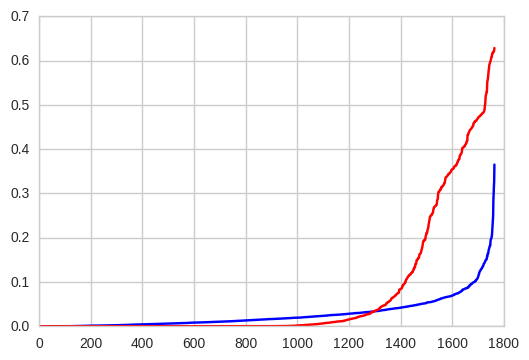

In [224]:
pix_per_cell = 8
cells_per_block = 2

win_size = (img.shape[1] // pix_per_cell * pix_per_cell, img.shape[0] // pix_per_cell * pix_per_cell)
block_size_px = (cells_per_block * pix_per_cell, cells_per_block * pix_per_cell)
nbins = 9
block_stride = (8, 8)
deriv_aperture = 1
win_sigma = 0.4
histogram_norm_type = 1
l2_hys_threshold = .1
gamma_correction = 1
nlevels = 64

hog = cv2.HOGDescriptor(_winSize=win_size,
                        _blockSize=block_size_px, 
                        _blockStride=block_stride,
                        _cellSize=(pix_per_cell,pix_per_cell),
                        _nbins=nbins,
                        _derivAperture=deriv_aperture,
                        _winSigma=win_sigma,
                        _histogramNormType=histogram_norm_type,
                        _L2HysThreshold=l2_hys_threshold,
                        _gammaCorrection=gamma_correction,
                        _nlevels=nlevels
                       )

hog_feats = hog.compute(img)
plt.plot(np.sort(feature_vec), label='old', color='b')[0]
plt.plot(np.sort(hog_feats, axis=0), label='opencv', color='r')[0]
plt.show()